# BUSINESS UNDERSTANDING
## Introduction

The real estate market is a dynamic and complex field influenced by numerous factors that affect property values.In the market, homeowners and stakeholders often seek ways to maximize property values, whether preparing to sell or enhancing their investments. Accurately predicting house prices is crucial for making informed decisions. This project aims to provide insights on home valuation and how various renovations can increase their estimated value. By leveraging data on homes in King County, we aim to help homeowners make informed decisions regarding their property.

## Problem Statement

Homeowners and real estate agents often face the challenge of accurately predicting home values and identifying which renovations will yield the highest return on investment. Inaccurate valuations can affect home sales and lead to significant losses for both buyers and sellers. Uninformed renovation decisions can result in unnecessary expenditures without a corresponding increase in property value. For a real estate agency that helps homeowners buy and sell homes, providing accurate home valuations and precise advice on effective renovations is crucial. Traditional methods often fail to capture the complexity and interactions between different factors, leading to less reliable predictions. This project addresses the problem of developing a reliable and accurate predictive model for house prices using linear regression, incorporating a comprehensive set of independent variables to improve prediction accuracy.

## Objectives

1. **Develop a model that accurately predicts the value of a house based on its features.**
   - Investigate the most important features in homes to create an accurate model for estimating home value.
   
2. **Explore and quantify the relationship between renovations and property value and refine the model based on the results.**
   - Determine whether renovations affect home prices. If a relationship exists, quantify it and refine the model to improve accuracy.
   
3. **Offer tailored recommendations to homeowners based on their property characteristics and market conditions.**
   - Provide homeowners with accurate property valuations and advise on whether renovations would be a worthwhile investment if they intend to sell.


By analyzing housing data, this project will develop a predictive model to guide homeowners in making strategic renovation investments that enhance property value. This model will also support stakeholders in urban development by providing a reliable tool for estimating housing prices.


# DATA UNDERSTANDING

In [327]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [328]:
df = pd.read_csv("data/kc_house_data.csv") # Read the data stored in kc_house_data.csv
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [329]:
df.columns # Accesses columns in our dataset

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# EDA & DATA CLEANING

In [330]:
df.shape

(21597, 21)

- Number of Rows (Observations): There are 21597 rows in the DataFrame.
- Number of Columns (Variables): There are 21 columns (or variables) in the DataFrame.

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [332]:
df.columns #check column names


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [333]:
df.describe() # Data Description of Numerical columns

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


- We drop  duplicated rows and columns that are not that relevant in helping us come up with the models

In [334]:
#drop duplicates
df = df.drop_duplicates(subset= ['id'])

In [335]:
df = df.drop(['id','date','view','sqft_above','sqft_basement','zipcode','lat','long','sqft_living15','sqft_lot15'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,NaN
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0


In [336]:
df.isna().sum() #Check for columns with null values

price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront      2353
condition          0
grade              0
yr_built           0
yr_renovated    3804
dtype: int64

In [337]:
#percentage of nans

percentage_nan = 3804/21420
percentage_nan

0.17759103641456583

filling nans with zeros, the assumption being that they have no water fronts and/or they have not been renovated, This because the percentage of nans for yr_renovated is almost  a significant 20% and may affect our analysis if we drop

In [338]:
#filling nans with zero
df = df.fillna(0.0)

Rechecking for null values

In [339]:
df.isna().sum()

price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
condition       0
grade           0
yr_built        0
yr_renovated    0
dtype: int64

next we convert waterfront and yr_renovated to boolean values, and give them suitable names

In [340]:
# Replace values in column 'yr_renovated' with booleans based on a condition
df['waterfront'] = df['waterfront'].apply(lambda x: x > 0)
# Replace values in column 'yr_renovated' with booleans based on a condition
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: x > 0)
df = df.rename(columns={'waterfront': 'has_waterfront', 'yr_renovated': 'is_renovated'})

In [341]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,has_waterfront,condition,grade,yr_built,is_renovated
0,221900.0,3,1.00,1180,5650,1.0,False,3,7,1955,False
1,538000.0,3,2.25,2570,7242,2.0,False,3,7,1951,True
2,180000.0,2,1.00,770,10000,1.0,False,3,6,1933,False
3,604000.0,4,3.00,1960,5000,1.0,False,5,7,1965,False
4,510000.0,3,2.00,1680,8080,1.0,False,3,8,1987,False


- Next replace yr_built with age

In [342]:
df['age'] = 2024 - df['yr_built']
df = df.drop(columns= ['yr_built'])


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21420 non-null  float64
 1   bedrooms        21420 non-null  int64  
 2   bathrooms       21420 non-null  float64
 3   sqft_living     21420 non-null  int64  
 4   sqft_lot        21420 non-null  int64  
 5   floors          21420 non-null  float64
 6   has_waterfront  21420 non-null  bool   
 7   condition       21420 non-null  int64  
 8   grade           21420 non-null  int64  
 9   is_renovated    21420 non-null  bool   
 10  age             21420 non-null  int64  
dtypes: bool(2), float64(3), int64(6)
memory usage: 1.7 MB


# Feature Selection

## Pair plot

In [344]:
sns.pairplot(data=df)

## Heatmap

<AxesSubplot:>

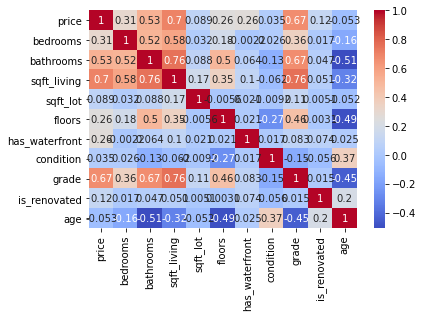

In [ ]:
sns.heatmap(df.corr(),cmap="coolwarm",annot=True)

## Correlation matrix

In [ ]:
df.corr() # Checked how diifferent independent variables relate to price

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,has_waterfront,condition,grade,is_renovated,age
price,1.000000,0.309453,0.526229,0.701875,0.089111,0.256286,0.264898,0.034779,0.668020,0.118179,-0.052906
bedrooms,0.309453,1.000000,0.515383,0.579069,0.032490,0.177734,-0.002205,0.025893,0.357988,0.017204,-0.155241
bathrooms,0.526229,0.515383,1.000000,0.755522,0.087779,0.501803,0.063635,-0.129362,0.665587,0.047259,-0.506252
sqft_living,0.701875,0.579069,0.755522,1.000000,0.172586,0.352868,0.104737,-0.061677,0.762477,0.050623,-0.316646
sqft_lot,0.089111,0.032490,0.087779,0.172586,1.000000,-0.005561,0.021429,-0.009169,0.113656,0.005105,-0.052312
floors,0.256286,0.177734,0.501803,0.352868,-0.005561,1.000000,0.020578,-0.266859,0.458091,0.003063,-0.488935
has_waterfront,0.264898,-0.002205,0.063635,0.104737,0.021429,0.020578,1.000000,0.016608,0.082905,0.074429,0.024842
condition,0.034779,0.025893,-0.129362,-0.061677,-0.009169,-0.266859,0.016608,1.000000,-0.150508,-0.055836,0.365129
grade,0.668020,0.357988,0.665587,0.762477,0.113656,0.458091,0.082905,-0.150508,1.000000,0.015385,-0.446235
is_renovated,0.118179,0.017204,0.047259,0.050623,0.005105,0.003063,0.074429,-0.055836,0.015385,1.000000,0.203430


- The correlation between price and bedrooms has a coefficient of 0.309453, indicating a moderate positive relationship. As the number of bedrooms increases, the price of the house tends to increase, but the relationship is not very strong.
- The correlation between price and bathrooms has a coefficient of 0.526229, indicating a moderate to strong positive relationship. More bathrooms are associated with higher house prices.
- The correlation between price and Sqft_living has a coefficient of 0.701875, indicating a strong positive relationship. Houses with larger living areas (square footage) tend to be more expensive.
- The correlation between price and sqft_lot has a coefficient of 0.089111, indicating a very weak positive relationship. The size of the lot has little impact on the house price.
- The correlation between price and floors has a coefficient of 0.256286, indicating a weak to moderate positive relationship. More floors are somewhat associated with higher house prices.
- The correlation between price and waterfront has a coefficient of 0.264898, indicating a weak to moderate positive relationship. Houses located on the waterfront tend to be more expensive.
- The correlation between price and condition has a coefficient of 0.034779, indicating an almost negligible positive relationship. The condition of the house has little to no impact on the price.
- The correlation between price and grade has a coefficient of 0.668020, indicating a strong positive relationship. Higher-grade houses (quality of construction and design) tend to be more expensive.
- The correlation between price and is_renovated has a coefficient of 0.118179, indicating a very weak positive relationship. The year the house was built has little impact on the house price.
- The correlation between price and age has a coefficient of 	-0.052906	, indicating a very weak negative relationship. The year the house was built has little impact on the house price.

## Check for any outliers

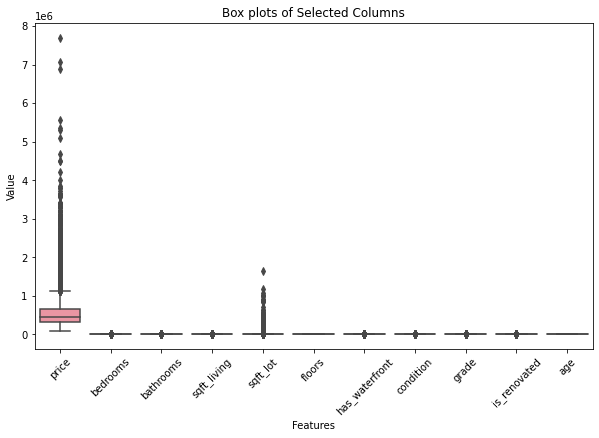

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

from this boxplot, outliers are present in every column apart from the age, and floors column.

Select numeric columns with high variability for outlier detection

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'has_waterfront', 'condition', 'grade', 'is_renovated', 'age'],
      dtype='object')

In [ ]:
df_selected_outliers = df[['price','sqft_living', 'sqft_lot', 
                            'age']]


# Calculate IQR for selected columns
Q1 = df_selected_outliers.quantile(0.25)
Q3 = df_selected_outliers.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df_selected_outliers< lower_bound) | (df_selected_outliers > upper_bound)).any(axis=1)

# Print indices of outliers
outlier_indices = df.index[outliers]

In [ ]:
# droping all rows with outliers 
df = df.drop(outlier_indices)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18071 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           18071 non-null  float64
 1   bedrooms        18071 non-null  int64  
 2   bathrooms       18071 non-null  float64
 3   sqft_living     18071 non-null  int64  
 4   sqft_lot        18071 non-null  int64  
 5   floors          18071 non-null  float64
 6   has_waterfront  18071 non-null  bool   
 7   condition       18071 non-null  int64  
 8   grade           18071 non-null  int64  
 9   is_renovated    18071 non-null  bool   
 10  age             18071 non-null  int64  
dtypes: bool(2), float64(3), int64(6)
memory usage: 1.4 MB


### We shall test the above features practically to create the most accurate model, leveraging on the information from the correlation matrix. Priority features will be those that have a strong correlation with the price

# ANALYSIS

## Analysis 1: Linear Regression Model for Prediction of Housing Prices


##### Investigation of the most important features in homes to create an accurate model for estimating home value.
##### From the correlation matrix above: 
##### Top Predictors - sqft_living,grade,  bathrooms, bedrooms, has_waterfront,floors,is_renovated, sqft_lot,age,condition

#### A.Simple Linear Regression Model

- First, we shall create a model with the top predictor,sqft_living,  and progressively add other predictors while evaluating the performance of our model

##### Data Preparation and Modeling

In [ ]:
#Data Preparations

x_model1 = df['sqft_living']
y_model1= df['price']

#Test train split
x_train,x_test,y_train,y_test = train_test_split(x_model1,y_model1,test_size=0.2,random_state=42)

# Reshape the arrays to 2D
x_train= x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

#Modeling
model1 = LinearRegression()
model1.fit(x_train,y_train)

#prediction
y_pred = model1.predict(x_test)

df_model1= pd.DataFrame({"Actual Price":y_test,"Predicted Price":y_pred})
df_model1.head()

,Actual Price,Predicted Price
15835,322000.0,473527.857419
3870,215000.0,307332.268828
994,291000.0,458264.997242
232,315000.0,641419.319363
18003,477500.0,458264.997242


##### Validation

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)

print("Mean Squared Error of Model: ",mse)
print("Mean Absolute Error of Model:",mae)
print("R Squared Value of Model:" ,r2)

Mean Squared Error of Model:  26997058887.541637
Mean Absolute Error of Model: 132831.78109333402
R Squared Value of Model: 0.35426536920193596


In [ ]:
#getting coefficients and intercepts
coefficients = model1.coef_
intercept = model1.intercept_
intercept, coefficients

(142832.5535907722, array([169.5873353]))

##### Simple Linear Regression Formula

The formula for predicting the price (y) can be expressed as:
y = β0 + β1 * sqft_living
Where:

- β0 is the intercept
- β1 is the coefficient for sqft_living

Placing the values of the intercept and coefficient, the formula can be expressed as:


y = **142832.5535907722** + **169.5873353** * sqft_living

#### Explanation:
- **Intercept (142832.55)**: This is the estimated price when the square footage of the living space is zero. It serves as the baseline price of a house without considering its size.
- **Coefficient (169.59)**: This represents the increase in price for each additional square foot of living space. For every extra square foot, the price is predicted to increase by approximately 169.59 dollars.

#### Performance Interpretation:
- The **MSE** value of 26,997,058,887.54 indicates that there is a significant average squared error between the actual and predicted prices. This suggests that there is room for improvement in the model.
- The **MAE** value of 132,831.78 tells us that, on average, our model's predictions are off by about 132,831.78 dollars.
- The **R² value** of 0.35 means that 35% of the variability in house prices is accounted for by the model based on square footage alone. This indicates a moderate level of explanatory power, but it also suggests that other factors not included in this model are influencing house prices.

In summary, while this simple linear regression model provides a basic understanding of how house prices vary with the size of the living area, its performance metrics indicate that it may not be sufficiently accurate for precise predictions. Including additional features could potentially improve the model's accuracy.

#### B.Multiple Linear Regression Model

- To improve the performance of our model, we shall add other key features in our simple model and evaluate its performance.
- We shall then create an additional model with the auxiliary features which do not have a very high correlation with the price and evaluate to verifyif our model improves
- The most accurate model across the metrics of errors and Rsquared will be chosen

Using 2 different sets of predictor variables and come up whith 2 different models.

In [ ]:
#checking columns
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'has_waterfront', 'condition', 'grade', 'is_renovated', 'age'],
      dtype='object')

sqft_living,grade,  bathrooms, bedrooms, has_waterfront,floors,is_renovated, sqft_lot,age,condition

In [ ]:

x_model2 = df[['sqft_living', 'grade', 'bathrooms', 'bedrooms', 'floors']]


x_model3 = df[[ 'sqft_living', 'grade', 'bathrooms','bedrooms', 'floors',
       'has_waterfront', 'is_renovated', 'sqft_lot', 'condition', 'age']]
y = df['price']


##### I. Model 2( Multiple linear regression model with top 5 predictors)

##### Data Preparation and Modeling

In [ ]:

#Test train split
x_train,x_test,y_train,y_test = train_test_split(x_model2,y,test_size=0.2,random_state=42)


#Modeling
model2 = LinearRegression()
model2.fit(x_train,y_train)

#prediction
y_pred = model2.predict(x_test)

df_model2= pd.DataFrame({"Actual Price":y_test,"Predicted Price":y_pred})
df_model2.head()

,Actual Price,Predicted Price
15835,322000.0,412338.591544
3870,215000.0,208020.178719
994,291000.0,401645.147856
232,315000.0,587149.502208
18003,477500.0,422363.623102


##### Validation

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)

print("Mean Squared Error of Model: ",mse)
print("Mean Absolute Error of Model:",mae)
print("R Squared Value of Model:" ,r2)

Mean Squared Error of Model:  23757545024.29692
Mean Absolute Error of Model: 122306.04934670829
R Squared Value of Model: 0.43175033884849523


In [ ]:
#getting coefficients and intercepts
coefficients = model2.coef_
intercept = model2.intercept_
intercept, coefficients

(-271416.9668649424,
 array([   118.81604097,  80470.38579525, -18220.19031844, -12892.82031154,
         -7053.33250738]))

##### Multiple Linear Regression Formula
The formula for predicting the price (y) can be expressed as:

**y** = **β0** + **β1** * sqft_living + **β2** * grade + **β3** * bathrooms + **β4** * bedrooms + **β5** * floors

Where:

- **β0** is the intercept
- **β1, β2, ..., β5** are the coefficients for each feature

Placing the values of the intercept and coefficients, the formula can be expressed as:

**y** = **-271416.9668649424** + **118.81604097** * sqft_living + **80470.38579525** * grade + **-18220.19031844** * bathrooms + **-12892.82031154** * bedrooms + **-7053.33250738** * floors

Where:

- **-271416.9668649424** is the intercept
- **118.81604097** is the coefficient for sqft_living
- **80470.38579525** is the coefficient for grade
- **-18220.19031844** is the coefficient for bathrooms
- **-12892.82031154** is the coefficient for bedrooms
- **-7053.33250738** is the coefficient for floors

#### Explanation:
- **Intercept (-271416.97)**: This is the estimated price when all the predictors (sqft_living, grade, bathrooms, bedrooms, floors) are zero. It serves as the baseline price of a house without considering these features.
- **Coefficients**:
  - **118.82 for sqft_living**: For each additional square foot of living space, the price is predicted to increase by approximately 118.82 dollars.
  - **80470.39 for grade**: For each unit increase in grade, the price is predicted to increase by approximately 80470.39 dollars.
  - **-18220.19 for bathrooms**: For each additional bathroom, the price is predicted to decrease by approximately 18220.19 dollars.
  - **-12892.82 for bedrooms**: For each additional bedroom, the price is predicted to decrease by approximately 12892.82 dollars.
  - **-7053.33 for floors**: For each additional floor, the price is predicted to decrease by approximately 7053.33 dollars.

#### Performance Interpretation:
- The **MSE** value of 23,757,545,024.30 indicates a significant average squared error between the actual and predicted prices, though it is slightly lower than the simple linear regression model, suggesting a better fit.
- The **MAE** value of 122,306.05 tells us that, on average, our model's predictions are off by about 122,306.05 dollars.
- The **R² value** of 0.43 means that 43% of the variability in house prices is accounted for by the model based on the features included. This indicates an improvement over the simple linear regression model and suggests that including multiple features provides a better explanation of house prices.

In summary, this multiple linear regression model provides a more comprehensive understanding of how various features influence house prices compared to the simple linear regression model. However, the performance metrics indicate that there is still room for improvement, and incorporating additional relevant features might further enhance the model's accuracy.

##### II. Model 3( Multiple linear regression model with all predictors)

##### Data Preparation and Modeling

In [ ]:

#Test train split
x_train,x_test,y_train,y_test = train_test_split(x_model3,y,test_size=0.2,random_state=42)


#Modeling
model3 = LinearRegression()
model3.fit(x_train,y_train)

#prediction
y_pred = model3.predict(x_test)

df_model3= pd.DataFrame({"Actual Price":y_test,"Predicted Price":y_pred})
df_model3.head()

,Actual Price,Predicted Price
15835,322000.0,361299.482749
3870,215000.0,249265.891748
994,291000.0,384425.642528
232,315000.0,573470.276826
18003,477500.0,407327.348712


In [ ]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2  = r2_score(y_test,y_pred)

print("Mean Squared Error of Model: ",mse)
print("Mean Absolute Error of Model:",mae)
print("R Squared Value of Model:" ,r2)

Mean Squared Error of Model:  18203549025.413246
Mean Absolute Error of Model: 105665.88359227464
R Squared Value of Model: 0.5645947190727462


In [ ]:
#getting coefficients and intercepts
coefficients = model3.coef_
intercept = model3.intercept_
intercept, coefficients

(-722928.656182566,
 array([ 1.10320360e+02,  1.05666687e+05,  2.50112847e+04, -1.56189331e+04,
         1.63381883e+04,  2.78527067e+05,  7.34724504e+03, -7.35820112e+00,
         2.18791947e+04,  2.69050331e+03]))

##### Multiple Linear Regression Formula

The formula for predicting the price (y) can be expressed as:

**y** = **β0** + **β1** * sqft_living + **β2** * grade + **β3** * bathrooms + **β4** * bedrooms + **β5** * floors + **β6** * has_waterfront + **β7** * is_renovated + **β8** * sqft_lot + **β9** * condition + **β10** * age 

Where:

- **β0** is the intercept
- **β1, β2, ..., β10** are the coefficients for each feature

Placing the values of the intercept and coefficients, the formula can be expressed as:

**y** = **-722928.656182566** + **110.32036** * sqft_living + **105666.687** * grade + **25011.2847** * bathrooms + **-15618.9331** * bedrooms + **16338.1883** * floors + **278527.067** * has_waterfront + **7347.24504** * is_renovated + **-7.35820112** * sqft_lot + **21879.1947** * condition + **2690.50331** * age

Where:

- **-722928.656182566** is the intercept
- **110.32036** is the coefficient for sqft_living
- **105666.687** is the coefficient for grade
- **25011.2847** is the coefficient for bathrooms
- **-15618.9331** is the coefficient for bedrooms
- **16338.1883** is the coefficient for floors
- **278527.067** is the coefficient for has_waterfront
- **7347.24504** is the coefficient for is_renovated
- **-7.35820112** is the coefficient for sqft_lot
- **21879.1947** is the coefficient for condition
- **2690.50331** is the coefficient for age


#### Explanation:
- **Intercept (-722928.66)**: This is the estimated price when all the predictors are zero. It provides a baseline price of a house without considering these features.
- **Coefficients**:
  - **110.32 for sqft_living**: For each additional square foot of living space, the price is predicted to increase by approximately 110.32 dollars.
  - **105666.69 for grade**: For each unit increase in grade, the price is predicted to increase by approximately 105666.69 dollars.
  - **25011.28 for bathrooms**: For each additional bathroom, the price is predicted to increase by approximately 25011.28 dollars.
  - **-15618.93 for bedrooms**: For each additional bedroom, the price is predicted to decrease by approximately 15618.93 dollars.
  - **16338.19 for floors**: For each additional floor, the price is predicted to increase by approximately 16338.19 dollars.
  - **278527.07 for has_waterfront**: Properties with waterfronts are predicted to be valued higher by approximately 278527.07 dollars.
  - **7347.25 for is_renovated**: Renovated properties are predicted to be valued higher by approximately 7347.25 dollars.
  - **-7.36 for sqft_lot**: Each additional square foot of lot size is predicted to decrease the price by approximately 7.36 dollars.
  - **21879.19 for condition**: For each unit increase in condition rating, the price is predicted to increase by approximately 21879.19 dollars.
  - **2690.50 for age**: For each year increase in the age of the property, the price is predicted to increase by approximately 2690.50 dollars.

#### Advantages of This Model:
- **Higher R² Value**: With an R² value of 0.56, this model explains a significant portion of the variance in house prices, making it more reliable than the previous models.
- **Lower Errors**: Both the MSE and MAE are lower in this model compared to previous ones, indicating more accurate and reliable predictions.
- **Comprehensive Features**: By including multiple relevant features, this model provides a more detailed and nuanced understanding of how different factors affect house prices, leading to better-informed decisions for stakeholders.

In summary, this final multiple linear regression model offers improved predictive accuracy and reliability by incorporating a broader range of features. This makes it a valuable tool for predicting house prices and making informed real estate decisions.

## Analysis 2: Relationship between renovations and property value
In this analysis, we aim to determine whether renovations affect home prices and, if so, to what extent.

First and foremost, inspecting the scatter plot of the 2 variables

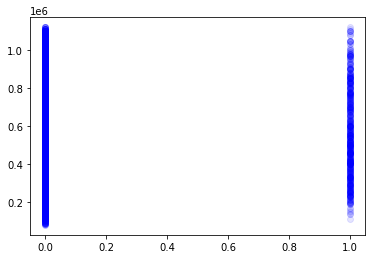

In [ ]:
plt.scatter(df['is_renovated'], df['price'], color='blue', label='Data Points', alpha =0.1)

This does not show the relationship clearly. Comparing the measures of central tendency

In [ ]:
# split into 2 dataframes, one with renovated houses, the other without
df_with_renovation = df[df['is_renovated']== True]
df_without_renovation =  df[df['is_renovated']== False]

In [ ]:
print(f"""Houses with Renovations:\nMean Price = {df_with_renovation['price'].mean()},
Mode Price = {df_with_renovation['price'].mode()}
""")
print(f"""Houses without Renovations:\nMean Price = {df_without_renovation['price'].mean()},
Mode Price = {df_without_renovation['price'].mode()}
""")


print(f"""Differences:\n
Mean Price = {df_with_renovation['price'].mean()-df_without_renovation['price'].mean()}
Mode Price = {df_with_renovation['price'].mode()- df_without_renovation['price'].mode()}
      """)


Houses with Renovations:
Mean Price = 570982.5055762082,
Mode Price = 0    550000.0
dtype: float64

Houses without Renovations:
Mean Price = 462107.1770946216,
Mode Price = 0    350000.0
dtype: float64

Differences:

Mean Price = 108875.32848158665
Mode Price = 0    200000.0
dtype: float64
      


As can be seen above, Renovated houses have a larger mean by approximately **110,000** dollars, and a larger mode by **200,000** dollars. This shows that renovated houses on average sell for higher prices. This comparison, however, does not keep in account the other differences between the houses. 

### Statistical Comparison

**Houses with Renovations:**
- Mean Price: \$570,982.51
- Mode Price: \$550,000.00

**Houses without Renovations:**
- Mean Price: \$462,107.18
- Mode Price: \$350,000.00

**Differences:**
- Mean Price Difference: \$108,875.33
- Mode Price Difference: \$200,000.00

As shown above, houses that have undergone renovations have a higher mean price by approximately \$110,000 and a higher mode price by \$200,000 compared to houses without renovations. This indicates that, on average, renovated houses sell for higher prices. However, this comparison does not account for other differences between the houses.

### Predictive Model Analysis

To further understand the impact of renovations on home prices, we use our predictive model:

**y** = **-722928.656182566** + **110.32036** * sqft_living + **105666.687** * grade + **25011.2847** * bathrooms + **-15618.9331** * bedrooms + **16338.1883** * floors + **278527.067** * has_waterfront + **7347.24504** * is_renovated + **-7.35820112** * sqft_lot + **21879.1947** * condition + **2690.50331** * age

Here, the coefficient for `is_renovated` is 7,347.25, indicating that renovations are predicted to increase the value of a home by approximately \$7,500.

### Conclusion

Based on our analysis and predictive model, we can conclude that renovations positively impact the valuation of a home. Renovated properties not only have higher mean and mode prices but are also predicted to be valued higher by approximately \$7,500 when other factors are held constant.


## Analysis 3: Tailored Recommendations

Based on the findings from our predictive model and statistical analysis, we can offer the following tailored recommendations to homeowners:

### Recommendations for Homeowners Willing to Sell

Homeowners planning to sell their houses should consider undertaking renovations, particularly if the cost of these renovations does not exceed **$7,500**. Our analysis indicates that renovations can increase the value of a home by approximately **$7,500**. Therefore, if the renovation costs are kept within this limit, homeowners are likely to see a positive return on investment.

### Recommendations for Homeowners Looking to Enhance Property Value

For homeowners not immediately looking to sell but aiming to enhance their property value for the future, strategic renovations can be beneficial. The key features to focus on, based on our model, include:

- **Square Footage (sqft_living):** Increasing the living area can significantly impact the home value.
- **Grade:** Improving the overall quality and finish of the house.
- **Bathrooms:** Adding or upgrading bathrooms can add substantial value.
- **Condition:** Ensuring the house is well-maintained and in good condition.

### General Advice

- **Cost-Benefit Analysis:** Homeowners should conduct a cost-benefit analysis before undertaking renovations. The predicted increase in home value should justify the renovation costs.
- **Market Conditions:** Homeowners should also consider the current market conditions and trends in their specific area. Consulting with real estate professionals can provide additional insights.

These tailored recommendations aim to help homeowners make informed decisions that maximize their property value and ensure a positive return on their renovation investments.


## Conclusion

The objectives of this project were successfully met:

1. **Accurate Prediction Model:** We developed a multiple linear regression model that accurately predicts the value of a house based on its features. The model incorporates key predictors such as square footage, grade, number of bathrooms, number of bedrooms, number of floors, presence of waterfront, renovation status, lot size, condition, and age of the house, providing a comprehensive tool for home valuation.

2. **Quantified Renovation Impact:** We explored and quantified the relationship between renovations and property value. Our analysis shows that renovated houses have higher mean and mode prices compared to non-renovated houses. Additionally, our predictive model indicates that renovations contribute to an increase in home value by approximately \$7,500, highlighting the financial benefits of investing in renovations.

3. **Tailored Recommendations:** Based on our findings, we can offer tailored recommendations to homeowners. Homeowners can be provided with accurate property valuations and advised on effective renovations to enhance their property value. This ensures that renovation decisions are informed and strategic, leading to better financial outcomes.

Overall, this project has provided valuable insights into home valuation and the impact of renovations. By leveraging data on homes in King County, we have developed a reliable predictive model and quantified the benefits of renovations, supporting homeowners and stakeholders in making informed decisions in the real estate market. This model can serve as a useful tool for real estate agencies, homeowners, and urban developers, guiding strategic investments and enhancing property values.
